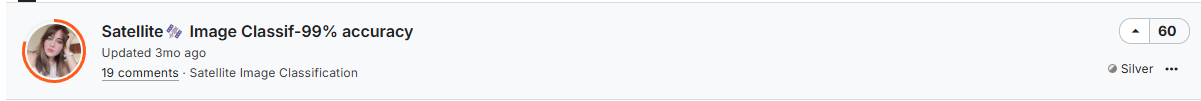

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
path = "D:\code_study\ML_CODE\dataSets\Satellite Image Classification\data"
batch_size = 32
height = 72
width = 128

In [3]:
#Loading the dataset and splitting into training and validation sets
from tensorflow.python.keras.preprocessing.image_dataset import image_dataset_from_directory
train = image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=1234,
    image_size=(height, width),
    batch_size=batch_size).map(lambda x, y: (x/255, y))

val = image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=1234,
    image_size=(height, width),
    batch_size=batch_size).map(lambda x, y: (x/255, y))

Found 5631 files belonging to 4 classes.
Using 4505 files for training.
Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


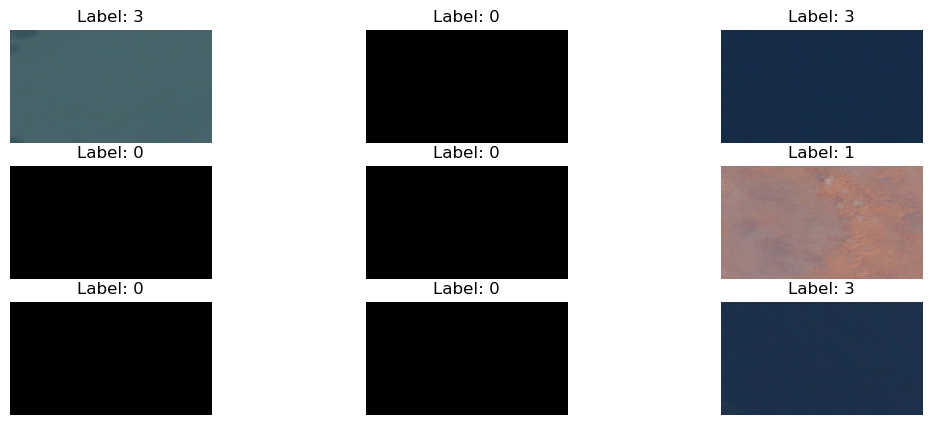

In [4]:
# Print the first images with their labels
plt.figure(figsize=(13, 5))
for i, (images, labels) in enumerate(train.take(1)):
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        plt.imshow((images[j].numpy() * 255.0).astype("uint8"))
        plt.title(f"Label: {labels[j].numpy()}")
        plt.axis("off")
plt.show()

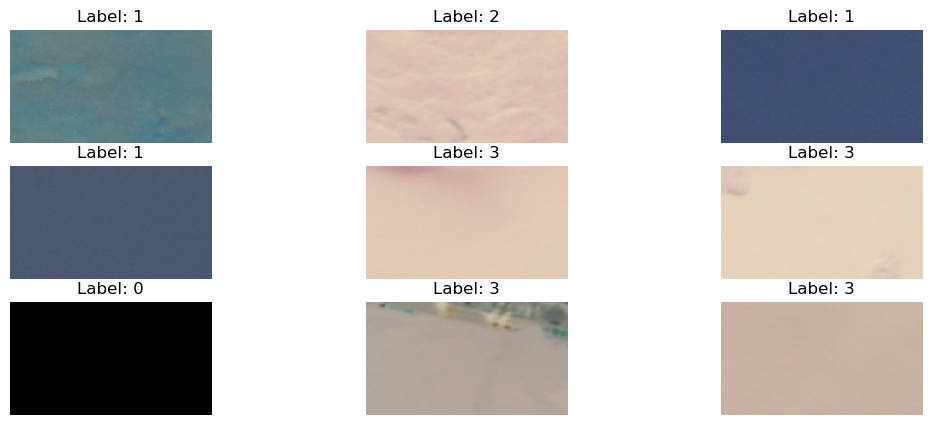

In [5]:
plt.figure(figsize=(13, 5))
for i, (images, labels) in enumerate(val.take(1)):
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        plt.imshow((images[j].numpy() * 255.0).astype("uint8") * 255)
        plt.title(f"Label: {labels[j].numpy()}")
        plt.axis("off")
plt.show()

In [6]:
amount = len(set(label for _, labels in train for label in labels.numpy()))
print(f"There are {amount} different Classes")

There are 4 different Classes


In [7]:
classes = {
    0: "cloudy",
    1: "desert",
    2: "water",
    3: "green_area"
}

In [8]:
# CNN model architecture
model = Sequential([
    layers.Input(shape=(height, width, 3)),
    #layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(amount)
])

# The first layer has 16 filters, kernel size equal to 3
# The max pooling layer allows to reduce the spatial dimensions
# The 2D feature flattened to 1D vector allows to prepare for the fully connected layer
# The fully connected layer has 128 neurons
# The output layer has 4 neurons (because there are 4 different classes)

In [9]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
epochs = 20
history = model.fit(
    train,
    validation_data=val,
    epochs=epochs,
    workers=5
)

Epoch 1/20
141/141 [==============================] - 19s 110ms/step - loss: 0.5472 - accuracy: 0.7273 - val_loss: 0.2909 - val_accuracy: 0.8979
Epoch 2/20
141/141 [==============================] - 4s 25ms/step - loss: 0.2916 - accuracy: 0.8521 - val_loss: 0.1925 - val_accuracy: 0.9147
Epoch 3/20
141/141 [==============================] - 4s 27ms/step - loss: 0.2157 - accuracy: 0.8967 - val_loss: 0.1791 - val_accuracy: 0.9130
Epoch 4/20
141/141 [==============================] - 4s 26ms/step - loss: 0.1627 - accuracy: 0.9259 - val_loss: 0.1869 - val_accuracy: 0.9254
Epoch 5/20
141/141 [==============================] - 4s 27ms/step - loss: 0.1595 - accuracy: 0.9284 - val_loss: 0.1537 - val_accuracy: 0.9210
Epoch 6/20
141/141 [==============================] - 4s 27ms/step - loss: 0.1327 - accuracy: 0.9361 - val_loss: 0.1456 - val_accuracy: 0.9396
Epoch 7/20
141/141 [==============================] - 4s 28ms/step - loss: 0.1213 - accuracy: 0.9467 - val_loss: 0.1661 - val_accuracy: 0.92

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 72, 128, 16)       448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 16, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

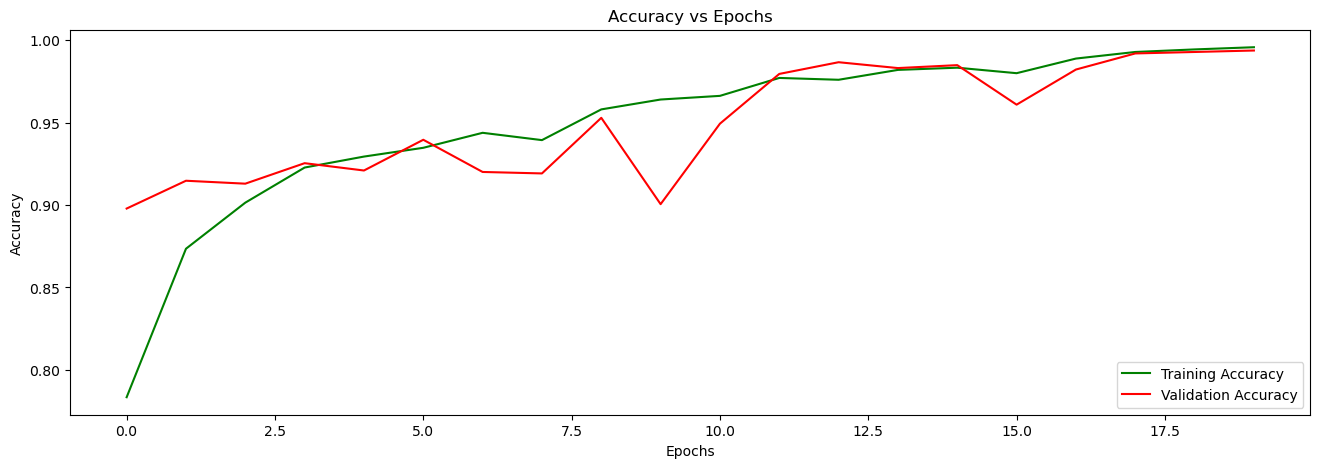

In [12]:
# accuracy and loss
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(16, 5))
plt.plot(epochs_range, accuracy, label='Training Accuracy', color='green')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', color='red')
plt.legend(loc='lower right')
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

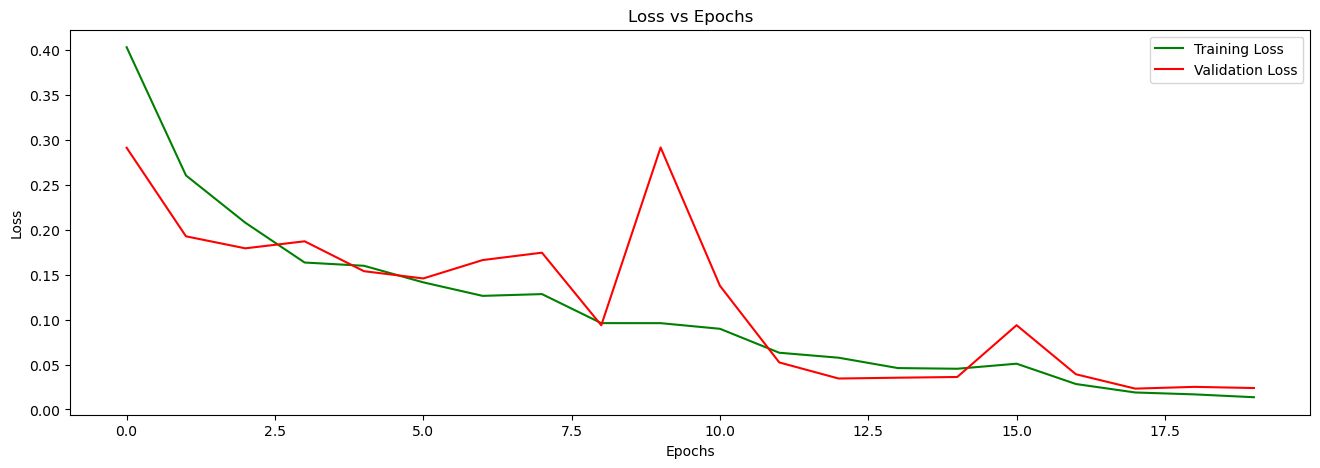

In [13]:
plt.figure(figsize=(16, 5))
plt.plot(epochs_range, loss, label='Training Loss', color='green')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='red')
plt.legend(loc='upper right')
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

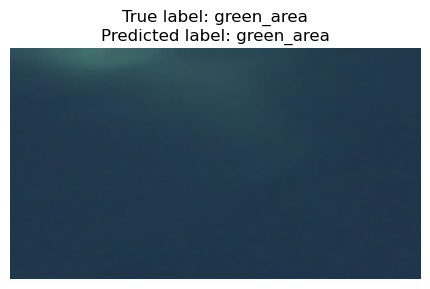

In [14]:
# Predicting one image from the validation dataset
plt.figure(figsize=(6, 3))  
for images, labels in val.take(1):
    sample_image = images[1]
    true_label = labels[1]

    sample_image = tf.expand_dims(sample_image, axis=0)

    predictions = model.predict(sample_image)

    predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
    predicted_class = classes[predicted_class_index]

    plt.imshow((sample_image[0].numpy() * 255.0).astype("uint8"))
    plt.title(f"True label: {classes[true_label.numpy()]}\nPredicted label: {predicted_class}")
    plt.axis('off')

plt.show()